**Data Handling**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Paths on drive 
#The cat_and_dog zip file is extracted, but the subfolder files 'cat_faces' and 'dog_faces' are zip files
#The face_img zip file extracted, but the subfolders files 'UTK Face Cropped' and 'face_align_celeba' are zip files

# /content/drive/MyDrive/GAN/cat_and_dog.zip
#Please replace these files accordingly
dog_zip_path = '/content/drive/MyDrive/GAN/cat_and_dog/dog faces.zip'
cat_zip_path = '/content/drive/MyDrive/GAN/cat_and_dog/cat_face.zip'

face_crop1='/content/drive/MyDrive/GAN/face_img/UTK Face Cropped.zip'
face_crop2='/content/drive/MyDrive/GAN/face_img/face_align_celeba.zip'


Handling cats and dogs data

In [ ]:
import zipfile
import os
import shutil

#extract path for cat dog images
extract_path = "/content/gantask/catdog"

# create the directory if it doesn't already exist
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

In [ ]:
# open the cat zip file
with zipfile.ZipFile(cat_zip_path, 'r') as zip_ref:
    # loop through all the files in the zip file
    for member in zip_ref.namelist():
        # if the member is a file (not a directory) and is a cat image, extract it to the specified directory
        if not member.endswith('/') and 'cat' in member and member.endswith('.png'):
            # extract the file to a temporary directory with the same folder structure as in the zip file
            zip_ref.extract(member, path='temp/')
            # move the file to the specified extract directory without the subdirectory structure
            shutil.move(os.path.join('temp', member), extract_path)
    # remove the temporary directory
    shutil.rmtree('temp')

In [ ]:
#extracting dog data
extract_path = "/content/gantask/dog_data"
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(dog_zip_path, 'r') as zip_obj:
  zip_obj.extractall(extract_path)

In [ ]:
# splitting cat dataset into train, test, validate
# len(os.listdir('/content/task1/catdog'))-- 29843
import random

data_dir = '/content/gantask/catdog'

# Create directories for the training, validation, and test sets
train_dir = '/content/gantask/cat_data/train'
os.makedirs(train_dir, exist_ok=True)
'''val_dir = '/content/gantask/cat_data/validate'
os.makedirs(val_dir, exist_ok=True)'''
test_dir = '/content/gantask/cat_data/test'
os.makedirs(test_dir, exist_ok=True)

# Get the list of image files in the directory
files = os.listdir(data_dir)
# Shuffle the list of files
random.shuffle(files)

# Calculate the number of files for each dataset
num_train = int(0.7 * len(files))
'''num_val = int(0.1 * len(files))'''
num_test = int(0.3 * len(files))

# Copy the files into the appropriate directories
for i, file in enumerate(files):
    if i < num_train:
        shutil.copy(os.path.join(data_dir, file), os.path.join(train_dir, file))
    else:
        shutil.copy(os.path.join(data_dir, file), os.path.join(test_dir, file))


In [ ]:
#REMOVING THE INITIAL CAT DIRECTORY
shutil.rmtree(data_dir)

In [ ]:
#dog data into train,test,validate
dog_train_from='/content/gantask/dog_data/train'
dog_train="/content/gantask/dog_data/train1"

dog_test_from1='/content/gantask/dog_data/test_200_database'
dog_test="/content/gantask/dog_data/test"

dog_test_from2='/content/gantask/dog_data/test_200_single_img'
'''dog_validate="/content/gantask/dog_data/validate"'''

for folder in [dog_train, dog_test]:
    os.makedirs(folder, exist_ok=True)

def data_extract(source_dir, dest_dir):
  i=0
  for subfolder in os.listdir(source_dir):
    subfolder_path = os.path.join(source_dir, subfolder)
    if os.path.isdir(subfolder_path):
        for filename in os.listdir(subfolder_path):
            if filename.endswith('.jpg'):
                new_name='dog'+str(i)+'.jpg'
                os.rename(os.path.join(subfolder_path,filename),os.path.join(subfolder_path,new_name))
                i=i+1
                image_path = os.path.join(subfolder_path, new_name)
                output_path = os.path.join(dest_dir, new_name)
                shutil.copyfile(image_path, output_path)



In [ ]:
data_extract(dog_train_from, dog_train)

In [ ]:
data_extract(dog_test_from1, dog_test)
data_extract(dog_test_from2, dog_test)

In [ ]:
'''os.rename(dog_validate_from, dog_validate)'''

'os.rename(dog_validate_from, dog_validate)'

In [ ]:
#train data 18286, test 1178+184
#DROP EXTRA DATA
shutil.rmtree('/content/gantask/dog_data/train')
shutil.rmtree('/content/gantask/dog_data/test_200_database')

In [ ]:
#moving dog data to cat folder
def data_copy(source_dir,dest_dir):
  for filename in os.listdir(source_dir):
    src_path = os.path.join(source_dir, filename)
    dest_path = os.path.join(dest_dir, filename)
    shutil.move(src_path, dest_path)

data_copy('/content/gantask/dog_data/train1','/content/gantask/cat_data/train')
data_copy('/content/gantask/dog_data/test','/content/gantask/cat_data/test')
#data_copy('/content/gantask/dog_data/validate','/content/gantask/cat_data/validate')

In [ ]:
#REMOVING empty dog folders
shutil.rmtree('/content/gantask/dog_data')

In [ ]:
os.rename('/content/gantask/cat_data','/content/gantask/cat_dog_data')

Handling face data

In [ ]:
extract_path = '/content/gantask/face_img'
if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(face_crop1, 'r') as zip_obj:
  zip_obj.extractall(extract_path)

with zipfile.ZipFile(face_crop2, 'r') as zip_obj:
  zip_obj.extractall(extract_path)

In [ ]:
#moving all faces data in one folder
image_path1='/content/gantask/face_img/img_align_celeba'
image_path2='/content/gantask/face_img/utkcropped'
final_path='/content/gantask/face_img_data'
if not os.path.exists(final_path):
    os.makedirs(final_path)

for filename in os.listdir(image_path1):
  if filename.endswith('.jpg'):
    image_path = os.path.join(image_path1, filename)
    output_path = os.path.join(final_path, filename)
    shutil.move(image_path, output_path)

for filename in os.listdir(image_path2):
  if filename.endswith('.jpg'):
    image_path = os.path.join(image_path2, filename)
    output_path = os.path.join(final_path, filename)
    shutil.move(image_path, output_path)


In [ ]:
len(os.listdir('/content/gantask/face_img_data'))

226308

In [ ]:
# REMOVE EXTRA FOLDERS
shutil.rmtree('/content/gantask/face_img')

In [ ]:
data_dir = '/content/gantask/face_img_data'

# Create directories for the training, validation, and test sets
train_dir = '/content/gantask/face_image/train'
os.makedirs(train_dir, exist_ok=True)
'''val_dir = '/content/gantask/face_image/validate'
os.makedirs(val_dir, exist_ok=True)'''
test_dir = '/content/gantask/face_image/test'
os.makedirs(test_dir, exist_ok=True)

files = os.listdir(data_dir)
random.shuffle(files)

num_train = int(0.7 * len(files))
#num_val = int(0.1 * len(files))
num_test = int(0.3 * len(files))

# Copy the files into the appropriate directories
for i, file in enumerate(files):
    if i < num_train:
        shutil.move(os.path.join(data_dir, file), os.path.join(train_dir, file))
    else:
        shutil.move(os.path.join(data_dir, file), os.path.join(test_dir, file))


In [ ]:
# REMOVE EXTRA FOLDERS
shutil.rmtree('/content/gantask/face_img_data')

In [ ]:
len(os.listdir('/content/gantask/face_image/train'))

158415

Loading datasets

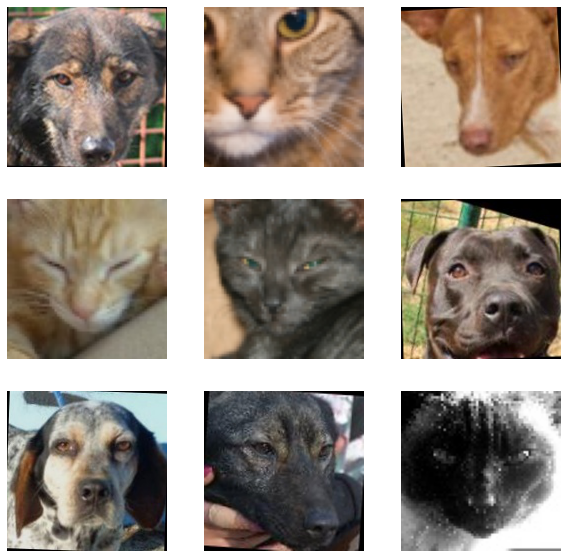

In [ ]:
#Visualising Cat dog dataset
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

catdog_train='/content/gantask/cat_dog_data/train'
index = np.random.randint(len(catdog_train))
file_names = os.listdir(catdog_train)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img_path = os.path.join(catdog_train, file_names[i])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

# Show the grid of images
plt.show()

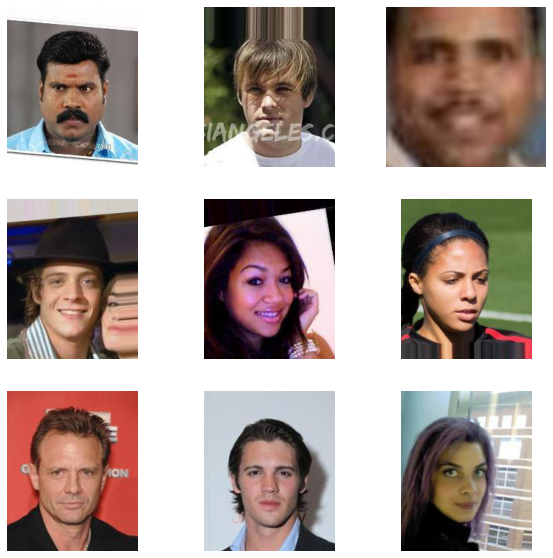

In [ ]:
#Visualising human faces dataset
import matplotlib.pyplot as plt
from PIL import Image

face_img_train='/content/gantask/face_image/train'
file_names = os.listdir(face_img_train)
fig, axes = plt.subplots(3, 3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img_path = os.path.join(face_img_train, file_names[i])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

# Show the grid of images
plt.show()

In [ ]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

face_train=image_dataset_from_directory(
    directory='/content/gantask/face_image/train',
    labels=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256))


face_test=image_dataset_from_directory(
    directory='/content/gantask/face_image/test',
    labels=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256))

catdog_train=image_dataset_from_directory(
    directory='/content/gantask/cat_dog_data/train',
    labels=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256))

catdog_test=image_dataset_from_directory(
    directory='/content/gantask/cat_dog_data/test',
    labels=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256))



Found 158415 files belonging to 1 classes.
Found 67893 files belonging to 1 classes.
Found 39137 files belonging to 1 classes.
Found 9542 files belonging to 1 classes.


In [ ]:
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import layers
autotune = tf.data.AUTOTUNE

# Define the standard image size.
orig_img_size = (286, 286)
# Size of the random crops to be used during training.
input_img_size = (256, 256, 3)

# Weights initializer for the layers.
kernel_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)
# Gamma initializer for instance normalization.
gamma_init = keras.initializers.RandomNormal(mean=0.0, stddev=0.02)

buffer_size = 256
batch_size = 1


def normalize_img(img):
    img = tf.cast(img, dtype=tf.float32)
    # Map values in the range [-1, 1]
    return (img / 127.5) - 1.0


def preprocess_train_image(img):
    # Random flip
    img=img[0]
    img = tf.image.random_flip_left_right(img)
    # Resize to the original size first
    img = tf.image.resize(img, [*orig_img_size])
    # Random crop to 256X256
    img = tf.image.random_crop(img, size=[*input_img_size])
    # Normalize the pixel values in the range [-1, 1]
    img = normalize_img(img)
    return img


def preprocess_test_image(img):
    # Only resizing and normalization for the test images.
    img=img[0]
    img = tf.image.resize(img, [input_img_size[0], input_img_size[1]])
    img = normalize_img(img)
    return img

In [ ]:
# Apply the preprocessing operations to the training data
face_train = (
    face_train.map(preprocess_train_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)
catdog_train = (
    catdog_train.map(preprocess_train_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

# Apply the preprocessing operations to the test data
face_test = (
    face_test.map(preprocess_test_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)
catdog_test = (
    catdog_test.map(preprocess_test_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size)
    .batch(batch_size)
)

In [ ]:
face_train

<BatchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

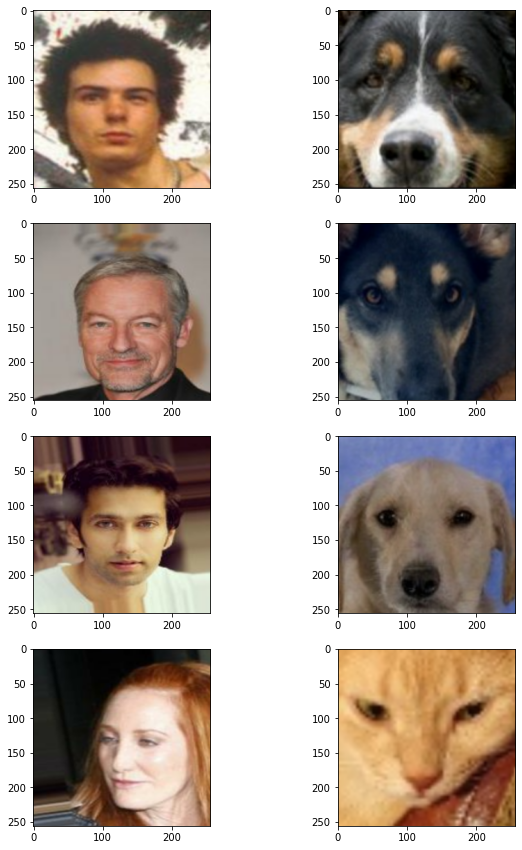

In [ ]:
_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, samples in enumerate(zip(face_train.take(4), catdog_train.take(4))):
    face = (((samples[0][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    catdog = (((samples[1][0] * 127.5) + 127.5).numpy()).astype(np.uint8)
    ax[i, 0].imshow(face)
    ax[i, 1].imshow(catdog)
plt.show()

Blocks used in the CycleGAN generators and discriminators

In [ ]:
pip install tensorflow_addons 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 16.7 MB/s eta 0:00:00


In [ ]:
import tensorflow_addons as tfa

class ReflectionPadding2D(layers.Layer):
    """Implements Reflection Padding as a layer.

    Args:
        padding(tuple): Amount of padding for the
        spatial dimensions.

    Returns:
        A padded tensor with the same type as the input tensor.
    """

    def __init__(self, padding=(1, 1), **kwargs):
        self.padding = tuple(padding)
        super().__init__(**kwargs)

    def call(self, input_tensor, mask=None):
        padding_width, padding_height = self.padding
        padding_tensor = [
            [0, 0],
            [padding_height, padding_height],
            [padding_width, padding_width],
            [0, 0],
        ]
        return tf.pad(input_tensor, padding_tensor, mode="REFLECT")


def residual_block(
    x,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(1, 1),
    padding="valid",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    dim = x.shape[-1]
    input_tensor = x

    x = ReflectionPadding2D()(input_tensor)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = activation(x)

    x = ReflectionPadding2D()(x)
    x = layers.Conv2D(
        dim,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.add([input_tensor, x])
    return x


def downsample(
    x,
    filters,
    activation,
    kernel_initializer=kernel_init,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2D(
        filters,
        kernel_size,
        strides=strides,
        kernel_initializer=kernel_initializer,
        padding=padding,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x


def upsample(
    x,
    filters,
    activation,
    kernel_size=(3, 3),
    strides=(2, 2),
    padding="same",
    kernel_initializer=kernel_init,
    gamma_initializer=gamma_init,
    use_bias=False,
):
    x = layers.Conv2DTranspose(
        filters,
        kernel_size,
        strides=strides,
        padding=padding,
        kernel_initializer=kernel_initializer,
        use_bias=use_bias,
    )(x)
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    if activation:
        x = activation(x)
    return x


In [ ]:

def get_resnet_generator(
    filters=64,
    num_downsampling_blocks=2,
    num_residual_blocks=9,
    num_upsample_blocks=2,
    gamma_initializer=gamma_init,
    name=None,
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = ReflectionPadding2D(padding=(3, 3))(img_input)
    x = layers.Conv2D(filters, (7, 7), kernel_initializer=kernel_init, use_bias=False)(
        x
    )
    x = tfa.layers.InstanceNormalization(gamma_initializer=gamma_initializer)(x)
    x = layers.Activation("relu")(x)

    # Downsampling
    for _ in range(num_downsampling_blocks):
        filters *= 2
        x = downsample(x, filters=filters, activation=layers.Activation("relu"))

    # Residual blocks
    for _ in range(num_residual_blocks):
        x = residual_block(x, activation=layers.Activation("relu"))

    # Upsampling
    for _ in range(num_upsample_blocks):
        filters //= 2
        x = upsample(x, filters, activation=layers.Activation("relu"))

    # Final block
    x = ReflectionPadding2D(padding=(3, 3))(x)
    x = layers.Conv2D(3, (7, 7), padding="valid")(x)
    x = layers.Activation("tanh")(x)

    model = keras.models.Model(img_input, x, name=name)
    return model

In [ ]:
#discriminator
def get_discriminator(
    filters=64, kernel_initializer=kernel_init, num_downsampling=3, name=None
):
    img_input = layers.Input(shape=input_img_size, name=name + "_img_input")
    x = layers.Conv2D(
        filters,
        (4, 4),
        strides=(2, 2),
        padding="same",
        kernel_initializer=kernel_initializer,
    )(img_input)
    x = layers.LeakyReLU(0.2)(x)

    num_filters = filters
    for num_downsample_block in range(3):
        num_filters *= 2
        if num_downsample_block < 2:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(2, 2),
            )
        else:
            x = downsample(
                x,
                filters=num_filters,
                activation=layers.LeakyReLU(0.2),
                kernel_size=(4, 4),
                strides=(1, 1),
            )

    x = layers.Conv2D(
        1, (4, 4), strides=(1, 1), padding="same", kernel_initializer=kernel_initializer
    )(x)

    model = keras.models.Model(inputs=img_input, outputs=x, name=name)
    return model


# Get the generators
gen_G = get_resnet_generator(name="generator_G")
gen_F = get_resnet_generator(name="generator_F")

# Get the discriminators
disc_X = get_discriminator(name="discriminator_X")
disc_Y = get_discriminator(name="discriminator_Y")


/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


In [ ]:
#CycleGAN model

class CycleGan(tf.keras.Model):
    def __init__(
        self,
        generator_G,
        generator_F,
        discriminator_X,
        discriminator_Y,
        lambda_cycle=10.0,
        lambda_identity=0.5,
    ):
        super().__init__()
        self.gen_G = generator_G
        self.gen_F = generator_F
        self.disc_X = discriminator_X
        self.disc_Y = discriminator_Y
        self.lambda_cycle = lambda_cycle
        self.lambda_identity = lambda_identity

    def call(self, inputs):
        return (
            self.disc_X(inputs),
            self.disc_Y(inputs),
            self.gen_G(inputs),
            self.gen_F(inputs),
        )

    def compile(
        self,
        gen_G_optimizer,
        gen_F_optimizer,
        disc_X_optimizer,
        disc_Y_optimizer,
        gen_loss_fn,
        disc_loss_fn,
    ):
        super().compile()
        self.gen_G_optimizer = gen_G_optimizer
        self.gen_F_optimizer = gen_F_optimizer
        self.disc_X_optimizer = disc_X_optimizer
        self.disc_Y_optimizer = disc_Y_optimizer
        self.generator_loss_fn = gen_loss_fn
        self.discriminator_loss_fn = disc_loss_fn
        self.cycle_loss_fn = keras.losses.MeanAbsoluteError()
        self.identity_loss_fn = keras.losses.MeanAbsoluteError()

    def train_step(self, batch_data):
        # x is face and y is cat/dog
        real_x, real_y = batch_data

        # For CycleGAN, we need to calculate different
        # kinds of losses for the generators and discriminators.
        # We will perform the following steps here:
        #
        # 1. Pass real images through the generators and get the generated images
        # 2. Pass the generated images back to the generators to check if we
        #    we can predict the original image from the generated image.
        # 3. Do an identity mapping of the real images using the generators.
        # 4. Pass the generated images in 1) to the corresponding discriminators.
        # 5. Calculate the generators total loss (adverserial + cycle + identity)
        # 6. Calculate the discriminators loss
        # 7. Update the weights of the generators
        # 8. Update the weights of the discriminators
        # 9. Return the losses in a dictionary

        with tf.GradientTape(persistent=True) as tape:
            # face to fake catdog
            fake_y = self.gen_G(real_x, training=True)
            # cat/dog to fake face -> y2x
            fake_x = self.gen_F(real_y, training=True)

            # Cycle (face to fake catdog to fake face): x -> y -> x
            cycled_x = self.gen_F(fake_y, training=True)
            # Cycle (catdog to fake face to fake catdog) y -> x -> y
            cycled_y = self.gen_G(fake_x, training=True)

            # Identity mapping
            same_x = self.gen_F(real_x, training=True)
            same_y = self.gen_G(real_y, training=True)

            # Discriminator output
            disc_real_x = self.disc_X(real_x, training=True)
            disc_fake_x = self.disc_X(fake_x, training=True)

            disc_real_y = self.disc_Y(real_y, training=True)
            disc_fake_y = self.disc_Y(fake_y, training=True)

            # Generator adverserial loss
            gen_G_loss = self.generator_loss_fn(disc_fake_y)
            gen_F_loss = self.generator_loss_fn(disc_fake_x)

            # Generator cycle loss
            cycle_loss_G = self.cycle_loss_fn(real_y, cycled_y) * self.lambda_cycle
            cycle_loss_F = self.cycle_loss_fn(real_x, cycled_x) * self.lambda_cycle

            # Generator identity loss
            id_loss_G = (
                self.identity_loss_fn(real_y, same_y)
                * self.lambda_cycle
                * self.lambda_identity
            )
            id_loss_F = (
                self.identity_loss_fn(real_x, same_x)
                * self.lambda_cycle
                * self.lambda_identity
            )

            # Total generator loss
            total_loss_G = gen_G_loss + cycle_loss_G + id_loss_G
            total_loss_F = gen_F_loss + cycle_loss_F + id_loss_F

            # Discriminator loss
            disc_X_loss = self.discriminator_loss_fn(disc_real_x, disc_fake_x)
            disc_Y_loss = self.discriminator_loss_fn(disc_real_y, disc_fake_y)

        # Get the gradients for the generators
        grads_G = tape.gradient(total_loss_G, self.gen_G.trainable_variables)
        grads_F = tape.gradient(total_loss_F, self.gen_F.trainable_variables)

        # Get the gradients for the discriminators
        disc_X_grads = tape.gradient(disc_X_loss, self.disc_X.trainable_variables)
        disc_Y_grads = tape.gradient(disc_Y_loss, self.disc_Y.trainable_variables)

        # Update the weights of the generators
        self.gen_G_optimizer.apply_gradients(
            zip(grads_G, self.gen_G.trainable_variables)
        )
        self.gen_F_optimizer.apply_gradients(
            zip(grads_F, self.gen_F.trainable_variables)
        )

        # Update the weights of the discriminators
        self.disc_X_optimizer.apply_gradients(
            zip(disc_X_grads, self.disc_X.trainable_variables)
        )
        self.disc_Y_optimizer.apply_gradients(
            zip(disc_Y_grads, self.disc_Y.trainable_variables)
        )

        return {
            "G_loss": total_loss_G,
            "F_loss": total_loss_F,
            "D_X_loss": disc_X_loss,
            "D_Y_loss": disc_Y_loss,
        }

In [ ]:
#Create a callback that periodically saves generated images
class GANMonitor(tf.keras.callbacks.Callback):
    """A callback to generate and save images after each epoch"""

    def __init__(self, num_img=4):
        self.num_img = num_img

    def on_epoch_end(self, epoch, logs=None):
        _, ax = plt.subplots(4, 2, figsize=(12, 12))
        for i, img in enumerate(face_test.take(self.num_img)):
            prediction = self.model.gen_G(img)[0].numpy()
            prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
            img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

            ax[i, 0].imshow(img)
            ax[i, 1].imshow(prediction)
            ax[i, 0].set_title("Input image")
            ax[i, 1].set_title("Translated image")
            ax[i, 0].axis("off")
            ax[i, 1].axis("off")

            prediction = keras.preprocessing.image.array_to_img(prediction)
            prediction.save(
                "generated_img_{i}_{epoch}.png".format(i=i, epoch=epoch + 1)
            )
        plt.show()
        plt.close()

In [ ]:

# Loss function for evaluating adversarial loss
adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5


# Create cycle gan model
cycle_gan_model = CycleGan(
    generator_G=gen_G, generator_F=gen_F, discriminator_X=disc_X, discriminator_Y=disc_Y
)

cycle_gan_model.compute_output_shape(input_shape=(None,256,256,3))
# Compile the model
cycle_gan_model.compile(
    gen_G_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_F_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_X_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    disc_Y_optimizer=keras.optimizers.Adam(learning_rate=2e-4, beta_1=0.5),
    gen_loss_fn=generator_loss_fn,
    disc_loss_fn=discriminator_loss_fn,
)
# Callbacks
plotter = GANMonitor()
checkpoint_filepath = "/content/drive/MyDrive/GAN/model_checkpoints/cyclegan_checkpoints.{epoch:03d}"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath
)

# Here we will train the model for just one epoch as each epoch takes around
# 7 minutes on a single P100 backed machine.
cycle_gan_model.fit(
    tf.data.Dataset.zip((face_train, catdog_train)),
    epochs=50,
    callbacks=[plotter, model_checkpoint_callback],
)

###**MODEL EVALUATION**

In [ ]:
cycle_gan_model.save('/content/drive/MyDrive/cyganmodel/cygan.h5')

In [ ]:
cycle_gan_model.save_weights('/content/drive/MyDrive/cyganmodel/cygan.h5')

Weights loaded successfully


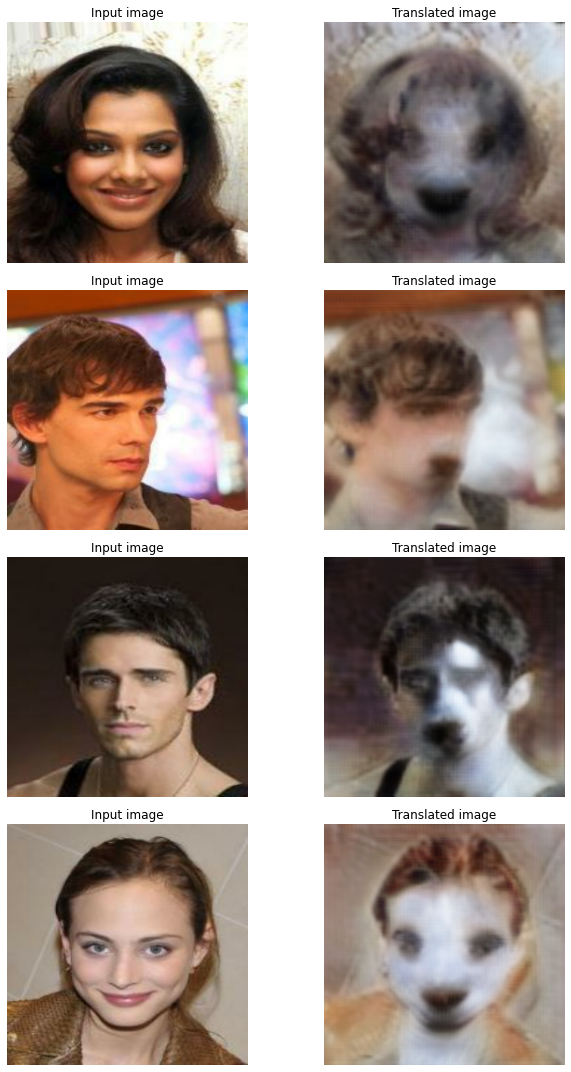

In [ ]:
# Load the checkpoints
# /content/drive/MyDrive/GAN/model_checkpoints/cyclegan_checkpoints.001
# /content/drive/MyDrive/GAN/model_checkpoints/cyclegan_checkpoints.050
weight_file = "/content/drive/MyDrive/GAN/model_checkpoints/cyclegan_checkpoints.050"
cycle_gan_model.load_weights(weight_file).expect_partial()
print("Weights loaded successfully")

_, ax = plt.subplots(4, 2, figsize=(10, 15))
for i, img in enumerate(face_test.take(4)):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()

Testing the model on our pictures

In [ ]:
test_imgs='/content/drive/MyDrive/cyganmodel/testing_images.zip'
extract_path = "/content/gantask/testing_images"

if not os.path.exists(extract_path):
    os.makedirs(extract_path)

with zipfile.ZipFile(test_imgs, 'r') as zip_obj:
  zip_obj.extractall(extract_path)

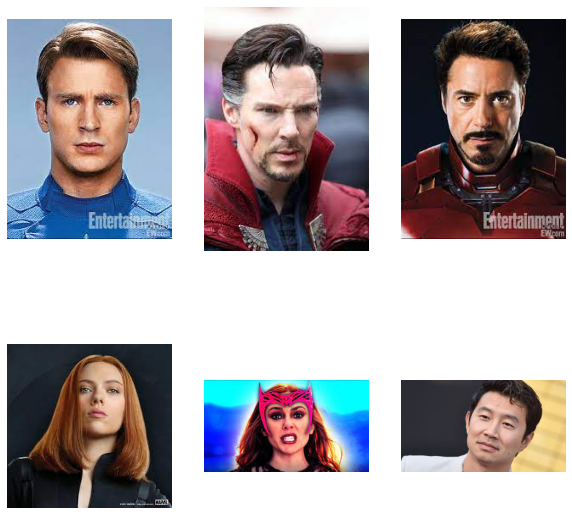

In [ ]:
test_img='/content/gantask/testing_images/testing_images'
file_names = os.listdir(test_img)
fig, axes = plt.subplots(2,3, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    img_path = os.path.join(test_img, file_names[i])
    img = Image.open(img_path)
    ax.imshow(img)
    ax.axis('off')

In [ ]:
test=image_dataset_from_directory(
    directory=test_img,
    labels=None,
    color_mode='rgb',
    batch_size=1,
    image_size=(256,256))

Found 6 files belonging to 1 classes.


In [ ]:
test

<BatchDataset element_spec=TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None)>

In [ ]:
test = (
    test.map(preprocess_train_image, num_parallel_calls=autotune)
    .cache()
    .shuffle(buffer_size=256)
    .batch(batch_size=1)
)

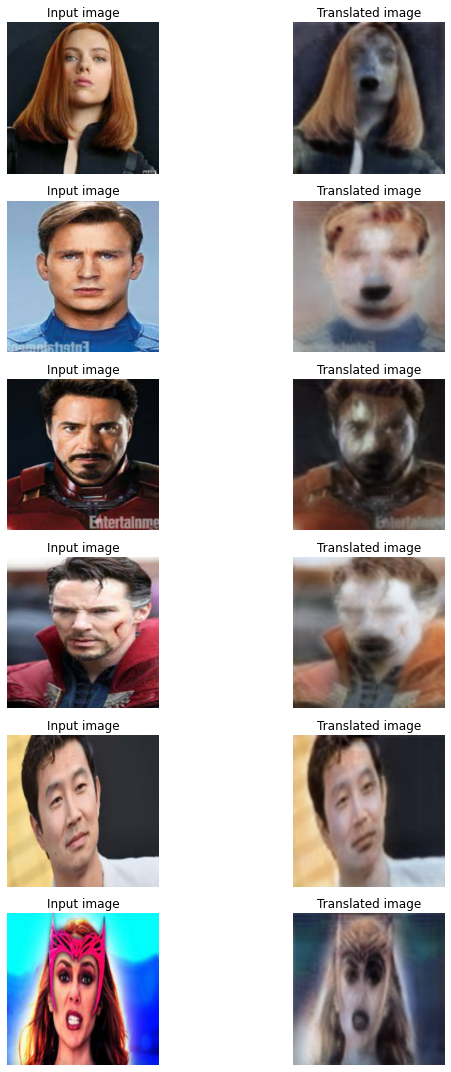

In [ ]:
_, ax = plt.subplots(6, 2, figsize=(10, 15))
for i, img in enumerate(test.take(6)):
    prediction = cycle_gan_model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()

In [ ]:
#Saving the model
cycle_gan_model.save("/content/drive/MyDrive/cyganmodel/gan_model")

In [ ]:
# #Saving checkpoints
# shutil.copytree(weight_file,'/content/drive/MyDrive/checkpoint_weights')

'/content/drive/MyDrive/checkpoint_weights'

In [ ]:
#loading model
from tensorflow.keras import models
model = models.load_model('/content/drive/MyDrive/cyganmodel/gan_model')

/usr/local/lib/python3.8/dist-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


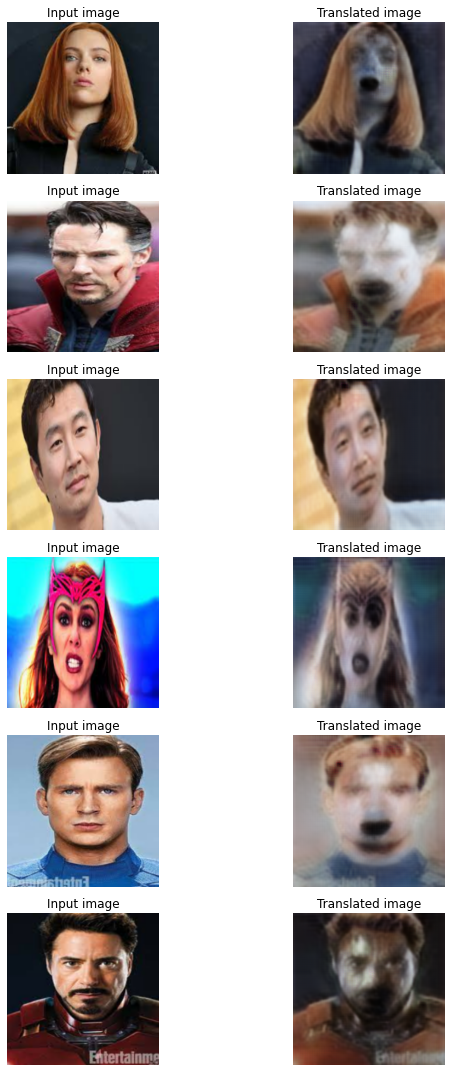

In [ ]:
_, ax = plt.subplots(6, 2, figsize=(10, 15))
for i, img in enumerate(test.take(6)):
    prediction = model.gen_G(img, training=False)[0].numpy()
    prediction = (prediction * 127.5 + 127.5).astype(np.uint8)
    img = (img[0] * 127.5 + 127.5).numpy().astype(np.uint8)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    prediction = keras.preprocessing.image.array_to_img(prediction)
    prediction.save("/content/drive/MyDrive/cyganmodel/output/predicted_img_{i}.png".format(i=i))
plt.tight_layout()
plt.show()